# Statistiken zur Sprachebene der deutschen Lyrics

In diesem Jupyter Notebook haben wir uns hauptsächlich auf den sprachlichen Stil der deutschen Lyrics beschäfigt. Damit ist gemeint, dass sich die Lyrics genauer angeschaut und auf Auffälligkeiten analysiert wurden. Unterteilt ist das Jupyter Notebook in folgende Unterthemen:

- Worthäufigkeiten
  - allgemein
  - Standorte
- Vielfältigkeit
- Konotation
- Grammatikalische Korrektheit

### Einführung 

In [1]:
import pandas as pd
from collections import Counter
import spacy
import spacy.cli
from spacy.tokens import Doc
# spacy.cli.download("de_core_news_lg")
# spacy.cli.download("de_core_news_md")
from spacy.language import Language
from spacy_language_detection import LanguageDetector
import pytextrank


In [16]:
df = pd.read_csv("../data/songs_complete_final.csv")

In [129]:
nlp = spacy.load("de_core_news_md")

In [10]:
df

,artist,artist_id,album,album_id,release_date,title,full_title,song_id,lyrics,release_year,weekday,genre,genre_cat,word_count
0,1099,209826,10999,831505,2021-10-29,INTRO (10999),INTRO (10999) by King Khalil,7337100,"Powpow Dicka, das kein Rap mehr, das ist Kind...",2021,Friday,post-rock,Rock,60
1,1099,209826,10999,831505,2021-10-29,GIB IHM,GIB IHM by King Khalil & AK 33,7337102,"Gefährliche, gefährliche KiKiKiKi Gefährliche ...",2021,Friday,post-rock,Rock,92
2,1099,209826,KING KONG,546439,2020-01-31,BUNDESWEIT,BUNDESWEIT by King Khalil (Ft. Fler),4532899,Aus meiner Stadt fliegen Leuchtclips und Bresl...,2020,Friday,post-rock,Rock,113
3,1099,209826,KING KONG,546439,2020-01-31,HOLLANDA,HOLLANDA by King Khalil (Ft. Mert),5189158,Because youre so sweet You lift up my heart An...,2020,Friday,post-rock,Rock,80
4,1099,209826,KING KONG,546439,2020-01-31,MOON,MOON by King Khalil & Lil Lano,5109178,. Liquid Swords GZA Actual . souljaboytellem...,2020,Friday,post-rock,Rock,233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17749,t-low,9229,Tyskie (EP),553779,2019-08-02,40 Nights,40 Nights by ​​t-low (Ft. Sevi Rin),4782294,"MBC Sie will nur Liebe, ich will nur Lean Pud...",2019,Friday,hip-hop,Rap,80
17750,t-low,9229,Tyskie (EP),553779,2019-08-02,Fast,Fast by ​​t-low,4782369,"Kozee, cooke die Sauce Ich bin fast fully tat...",2019,Friday,hip-hop,Rap,98
17751,t-low,9229,Tyskie (EP),553779,2019-08-02,Fliegt,Fliegt by ​​t-low (Ft. Murcy),4784534,"Rope God, youre so anorexic Und sie fliegt ja...",2019,Friday,hip-hop,Rap,90
17752,t-low,9229,Tyskie (EP),553779,2019-08-02,Lonely,Lonely by ​​t-low,4784567,"Sie ist lonely, Ja Sie will nur zu ihrem Homi...",2019,Friday,hip-hop,Rap,60


In [22]:
# Tokenisieren und Zählen der Wörter
df['lyrics'] = df['lyrics'].apply(lambda x: len([token.text for token in nlp(x)]))

In [23]:
df

,artist,artist_id,album,album_id,release_date,title,full_title,song_id,lyrics,release_year,weekday,genre,genre_cat,word_count
0,1099,209826,10999,831505,2021-10-29,INTRO (10999),INTRO (10999) by King Khalil,7337100,144,2021,Friday,post-rock,Rock,60
1,1099,209826,10999,831505,2021-10-29,GIB IHM,GIB IHM by King Khalil & AK 33,7337102,217,2021,Friday,post-rock,Rock,92
2,1099,209826,KING KONG,546439,2020-01-31,BUNDESWEIT,BUNDESWEIT by King Khalil (Ft. Fler),4532899,274,2020,Friday,post-rock,Rock,113
3,1099,209826,KING KONG,546439,2020-01-31,HOLLANDA,HOLLANDA by King Khalil (Ft. Mert),5189158,99,2020,Friday,post-rock,Rock,80
4,1099,209826,KING KONG,546439,2020-01-31,MOON,MOON by King Khalil & Lil Lano,5109178,408,2020,Friday,post-rock,Rock,233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17749,t-low,9229,Tyskie (EP),553779,2019-08-02,40 Nights,40 Nights by ​​t-low (Ft. Sevi Rin),4782294,267,2019,Friday,hip-hop,Rap,80
17750,t-low,9229,Tyskie (EP),553779,2019-08-02,Fast,Fast by ​​t-low,4782369,262,2019,Friday,hip-hop,Rap,98
17751,t-low,9229,Tyskie (EP),553779,2019-08-02,Fliegt,Fliegt by ​​t-low (Ft. Murcy),4784534,331,2019,Friday,hip-hop,Rap,90
17752,t-low,9229,Tyskie (EP),553779,2019-08-02,Lonely,Lonely by ​​t-low,4784567,228,2019,Friday,hip-hop,Rap,60


In [6]:
# Ausgeben der einzelnen Genres
df.value_counts('genre')

genre
deutschrap      4033
pop             2560
rap             2395
schlager        1343
hip-hop         1271
hip hop         1256
rock             663
indie            632
deutschrock      416
punk rock        390
reggae           264
ambient          222
[]               214
karneval         201
electro          162
deutsch rap      130
instrumental     119
gothic           117
emo              109
cloud rap         69
swing             66
new wave          64
ndw               53
pop rock          53
post-rock         49
party             41
pornorap          27
dubstep           12
metal              5
dtype: int64

### Worthäufigkeiten

In [40]:
# genres gruppieren
df_genre = df.groupby('genre')

# durchschnittliche Lyriclänge pro genre 
avg_lyrics_length = df_genre.mean()['lyrics']

lyrics_length = df_genre.describe()['lyrics']


genre
[]              234.018692
ambient         221.747748
cloud rap       190.231884
deutsch rap     221.453846
deutschrap      238.905033
deutschrock     152.951923
dubstep         254.333333
electro         187.574074
emo             175.412844
gothic          147.290598
hip hop         225.214968
hip-hop         217.366640
indie           162.879747
instrumental    153.159664
karneval        155.353234
metal           120.800000
ndw             159.943396
new wave        149.156250
party           187.170732
pop             168.572656
pop rock        142.075472
pornorap        219.407407
post-rock       248.632653
punk rock       151.056410
rap             221.369102
reggae          182.303030
rock            160.731523
schlager        162.136262
swing           160.893939
Name: lyrics, dtype: float64 


                count        mean         std    min     25%    50%     75%  \
genre                                                                        
[]             214.0  

In [39]:
genres = df['genre'].unique()

for genre in genres:
    # Filterung nach genres
    df_g = df[df['genre'] == genre]
    
    if not df_g.empty:
        # Kürzeste Lyric herausfinden
        shortest_lyric_title = df_g.loc[df_g['lyrics'].idxmin(), 'title']
        shortest_lyric_artist = df_g.loc[df_g['lyrics'].idxmin(), 'artist']
        # Anzahl Wörter
        word_count_short = df_g['lyrics'].min()

        # Längste Lyric herausfinden
        longest_lyric_title = df_g.loc[df_g['lyrics'].idxmax(), 'title']
        longest_lyric_artist = df_g.loc[df_g['lyrics'].idxmax(), 'artist']
        # Anzahl Wörter
        word_count_long = df_g['lyrics'].max()

        print(f"Der kürzeste {genre}-Song ist '{shortest_lyric_title}' von {shortest_lyric_artist} mit insgesamt {word_count_short} Wörtern")
        print(f"Der längste {genre}-Song ist '{longest_lyric_title}' von {longest_lyric_artist} mit insgesamt {word_count_long} Wörtern\n")



Der kürzeste post-rock-Song ist 'Moshpit' von 1099 mit insgesamt 47 Wörtern
Der längste post-rock-Song ist 'Großstadtschakale' von 1099 mit insgesamt 584 Wörtern

Der kürzeste deutsch rap-Song ist 'KILOWEISE' von 18 Karat mit insgesamt 140 Wörtern
Der längste deutsch rap-Song ist 'Ready to Die' von 18 Karat mit insgesamt 903 Wörtern

Der kürzeste rap-Song ist 'Totentanz' von Die Atzen mit insgesamt 61 Wörtern
Der längste rap-Song ist '100 Bars' von Farid Bang mit insgesamt 950 Wörtern

Der kürzeste pop-Song ist 'Betonblock' von Nena mit insgesamt 69 Wörtern
Der längste pop-Song ist 'In Tyrannis' von Ich + Ich mit insgesamt 1201 Wörtern

Der kürzeste hip hop-Song ist 'Er-sagt-Sie-sagt' von Max Herre mit insgesamt 84 Wörtern
Der längste hip hop-Song ist 'Die Unendlichste Geschichte (Kapitel 1)' von SDP mit insgesamt 1091 Wörtern

Der kürzeste schlager-Song ist 'Keine Panik' von Michael Wendler mit insgesamt 53 Wörtern
Der längste schlager-Song ist 'Der “Nie genug” Hitmix' von Wolfgang Pe

In [63]:
pd.options.plotting.backend = "plotly"

# Darstellung durchschnittliche Wortlänge
lyric_fig = avg_lyrics_length.plot(kind='bar', title='Durchschnittliche Wörtlänge für jedes Genre')
lyric_fig.show()

# speichern als HTML
lyric_fig.write_html("../notebooks/german_lyrics_statistics.html")

#### Wie unterscheiden sich die Wortschätze von Pop und Rap voneinander?

Man würde meinen, dass Pop und Rap ziemliche Gegensätze voneinander sind. Pop wird eher mit einfachen und oberflächlichen Texten verbunden, während 

In [43]:
df = pd.read_csv("../data/songs_complete_final.csv")

In [48]:
pop_df = df[df['genre_cat'] == 'Pop']
rap_df = df[df['genre_cat'] == 'Rap']

In [71]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image

pop_song_word_count = Counter()
rap_song_word_count = Counter()

for lyrics in pop_df["lyrics"]:
    doc = nlp(lyrics)
    song_words = set()
    for token in doc:
        if token.pos_ == 'NOUN':
            song_words.add(token.text)
    for word in song_words:
        pop_song_word_count[word] += 1

for lyrics in rap_df["lyrics"]:
    doc = nlp(lyrics)
    song_words = set()
    for token in doc:
        if token.pos_ == 'NOUN':
            song_words.add(token.text)
    for word in song_words:
        rap_song_word_count[word] += 1

pop_common_nouns = pop_song_word_count.most_common(15)
rap_common_nouns = rap_song_word_count.most_common(15)


[('Zeit', 636), ('Leben', 595), ('Welt', 562), ('Tag', 500), ('Nacht', 474), ('Herz', 421), ('Liebe', 410), ('Augen', 340), ('Kopf', 314), ('Weg', 280), ('Hab', 268), ('Hand', 248), ('Licht', 248), ('Glück', 238), ('Mann', 237)]


In [73]:
print(pop_common_nouns)
print(rap_common_nouns)

[('Zeit', 636), ('Leben', 595), ('Welt', 562), ('Tag', 500), ('Nacht', 474), ('Herz', 421), ('Liebe', 410), ('Augen', 340), ('Kopf', 314), ('Weg', 280), ('Hab', 268), ('Hand', 248), ('Licht', 248), ('Glück', 238), ('Mann', 237)]
[('Leben', 2185), ('Zeit', 1741), ('Tag', 1667), ('Welt', 1566), ('Geld', 1551), ('Mann', 1395), ('Kopf', 1391), ('Nacht', 1249), ('Rapper', 1113), ('Weg', 1013), ('Augen', 958), ('Leute', 867), ('Rap', 842), ('Stadt', 833), ('Herz', 830)]


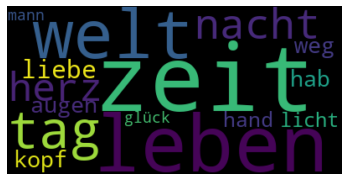

In [74]:
pop_nouns_text = ' '.join([noun for noun, count in pop_common_nouns]).lower()

wordcloud = WordCloud(prefer_horizontal=2).generate(pop_nouns_text)
# docs.post_
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

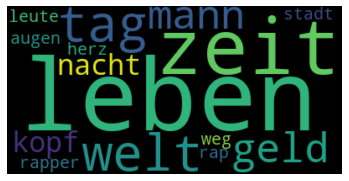

In [75]:
rap_nouns_text = ' '.join([noun for noun, count in rap_common_nouns]).lower()

wordcloud = WordCloud(prefer_horizontal=2).generate(rap_nouns_text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Locations

#### Welche Locations werden in den Songtexten genannt?

In [52]:
locations = []
unique_locations = set()
 
for song in df["lyrics"]:
    doc = nlp(song)
    for ent in doc.ents:
        if ent.label_ == "LOC":
            locations.append(ent.text)
        elif ent.label_ == "GPE":
            locations.append(ent.text)


In [76]:
print(len(locations))

41501


Anfangs wurden über pycountry versucht die Standorte herauszufiltern, wobei sehr oft fehlerhafte Ergebnisse herausgeliefert wurden. 

In [79]:
import pycountry

filtered_locations = []
for location in locations:
    try:
        country = pycountry.countries.get(alpha_2=location.upper())
        filtered_locations.append(location)
    except LookupError:
        print(f"{location} is not a valid ISO country code")

print(filtered_locations)

['Dicka', 'Mehringdamm', 'Pac  Werf', 'Weezy', 'Leuchtclips', 'Breslauer', 'UF', 'Streetchabos Ich hab schöne Eier', 'Nenn', 'Erde', 'Stadt', 'Hessens', 'Mond', 'Sehe', 'Texas', 'Hampton Coliseum Live   ', 'kring Som om inget', 'Som om', 'Så ge', 'minns dagarna', 'Park Och', 'och döden', 'allting i sin', 'Reibach', 'Hahaha Woop', 'woop', 'Ey', 'Papa', 'Papa', 'Deutschland', 'Jannidis', 'Stuttgart', 'Tübingen', 'Jannidis', 'Stuttgart', 'Jannidis', 'Stuttgart', 'Lüneburg', 'Berlin', 'Bielefeld', 'Gymnich', 'Trier', 'Frankfurt am Main', 'Hamburg', 'Frankfurt am Main', 'Paderborn', 'Bielefeld', 'Wood', 'TrackAntilopen Gang  ', 'Europas', 'Big Bad BirdsEdgar', 'Ey', 'Sorry', 'Ma', 'Hab', 'Straße', 'SillaCode', 'Chardonnay Chardonnay Hörn', 'Straße gehen  ', 'Stadt', 'zitiern', 'Zеilen', 'lembellisement de la vie', 'lembellisement de la vie', 'HipHopFahne', 'Russland', 'tupac', 'stuttgarter barrios', 'Weil', 'bewahrtn', 'bboys', 'spreadens', 'Juri', 'Straße', 'Pussies nass', 'Tapilanien', 'B

In [82]:
from geotext import GeoText

def is_valid_location(location):
    if GeoText(location).cities:
        places = GeoText(location).cities
        return True


    elif GeoText(location).countries:
        places = GeoText(location).countries
        return True


valid_locations = [location for location in locations if is_valid_location(location) == True]

print(valid_locations)

['Texas', 'Stuttgart', 'Stuttgart', 'Stuttgart', 'Berlin', 'Bielefeld', 'Trier', 'Hamburg', 'Paderborn', 'Bielefeld', 'Mitchell  Ness Weiber', 'Berlin', 'Offenbach am Main', 'Finland', 'Holland', 'Venlo', 'Holland', 'Medellín', 'Medellín', 'Venlo', 'Amsterdam', 'Casablanca', 'Amsterdam', 'Amsterdam', 'China', 'Marbella', 'Amsterdam', 'Rotterdam', 'Hamburg', 'Bolivia', 'Marseille', 'Rotterdam', 'Holland', 'Rotterdam', 'Dortmund', 'Dortmund', 'Hamada', 'Hemşo Ich schmuggel', 'Venlo', 'Ecuador', 'Dortmund', 'Dortmund', 'Amsterdam', 'Rotterdam', 'Dortmund', 'bambambam Dortmund', 'Ghana  ', 'Dortmund', 'Dortmund', 'Dortmund', 'China', 'Dortmund', 'Amsterdam', 'Dortmund', 'Paris Fuck the Police  ', 'Rotterdam', 'Tempelhof', 'Schöneberg', 'Rotterdam', 'Nijmegen', 'Stuttgart', 'Dortmund', 'Heidelberg', 'Straße  Straight Flush Dortmund', 'Berlin', 'Essen', 'Bam', 'badabam Bam', 'Herzogenaurach', 'Holland', 'Paris', 'China', 'Ibiza', 'Holland', 'Holland', 'Holland', 'Ganja', 'Boom', 'Boom', 'Hol

In [83]:
from collections import Counter

valid_locations_dict = dict(Counter(valid_locations))

print(valid_locations_dict)

{'Texas': 8, 'Stuttgart': 29, 'Berlin': 524, 'Bielefeld': 5, 'Trier': 1, 'Hamburg': 142, 'Paderborn': 1, 'Mitchell  Ness Weiber': 1, 'Offenbach am Main': 9, 'Finland': 1, 'Holland': 38, 'Venlo': 10, 'Medellín': 8, 'Amsterdam': 35, 'Casablanca': 5, 'China': 27, 'Marbella': 3, 'Rotterdam': 15, 'Bolivia': 4, 'Marseille': 17, 'Dortmund': 27, 'Hamada': 1, 'Hemşo Ich schmuggel': 1, 'Ecuador': 3, 'bambambam Dortmund': 1, 'Ghana  ': 2, 'Paris Fuck the Police  ': 1, 'Tempelhof': 15, 'Schöneberg': 23, 'Nijmegen': 1, 'Heidelberg': 3, 'Straße  Straight Flush Dortmund': 1, 'Essen': 21, 'Bam': 1, 'badabam Bam': 1, 'Herzogenaurach': 1, 'Paris': 195, 'Ibiza': 23, 'Ganja': 7, 'Boom': 2, 'Wau': 2, 'Iran': 13, 'Schöne dran  Man': 1, 'Moers': 1, 'Baden gehn   Grad': 1, 'Caracas': 1, 'Reeperbahn Hab Hamburg': 1, 'Cottbus': 1, 'Ami': 7, 'Mardin': 8, 'town  Hamburg': 1, 'Norderstedt': 1, 'ansBeinPisser  Wer bistn du': 1, 'Vietnam': 3, 'New York': 79, 'London': 35, 'Meppen': 2, 'Po Mensch Bo  ': 2, 'Bonn': 29

In [86]:
valid_locations_df = pd.DataFrame(list(valid_locations_dict.items()), columns=['Location', 'Count'])

valid_locations_df

,Location,Count
0,Texas,8
1,Stuttgart,29
2,Berlin,524
3,Bielefeld,5
4,Trier,1
...,...,...
823,Delphin Imperial Trump Tower New York,1
824,Paris le Meridien Flaschen,1
825,Zion,2
826,Jericho,1


In [92]:
import plotly.graph_objects as go
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="my_app")

max_count = max(valid_locations_dict.values())

latitudes = []
longitudes = []
marker_sizes = []
hover_texts = []

for location, count in valid_locations_dict.items():
    try:
        geocode = geolocator.geocode(location)
        if geocode is not None:
            lat = geocode.latitude
            lon = geocode.longitude
            
            latitudes.append(lat)
            longitudes.append(lon)
            
            marker_size = count / max_count * 50 
            marker_sizes.append(marker_size)
            hover_text = f"{location}<br>Count: {count}"
            hover_texts.append(hover_text)
    except:
        pass

location_map = go.Figure(data=go.Scattergeo(
    lat=latitudes,
    lon=longitudes,
    mode='markers',
    marker=dict(
        size=marker_sizes,
        color='blue',
        opacity=0.7,
        line=dict(width=0)
    ),
    hovertemplate=hover_texts
))

location_map.update_layout(
    title='Standorte',
    geo=dict(
        resolution=110,
        showland=True,
        landcolor='lightgray',
        showcountries=True,
        countrycolor='white',
        coastlinecolor='white',
        projection_type='natural earth'
    ),
    width=2000,
    height=1200
)

location_map.show()

### Vielfältigkeit

#### Wie vielfältig sind deutsche Songtexte?

In [114]:
song_variety = []


count = 0
for idx, row in df.iterrows():
    # if count >= 100:
    #     break
    text = row['lyrics']
    song_title = row['title']
    genre = row['genre']
    count+= 1
    
    # Text mit Spacy analysieren
    doc = nlp(text)
    
    wortarten = ['NOUN', 'VERB', 'ADJ', 'ADV']
    unique_words = set()
    for token in doc:
        if not token.is_stop and token.is_alpha and token.pos_ in wortarten:
            unique_words.add(token.lemma_)
    

    song_uniqueness =  {'song_title': song_title, 'lyric_num': idx, 'genres': genre, "unique_words": unique_words}

    
    song_variety.append(song_uniqueness)


In [115]:
# Speichern als df für spätere Bearbeitung
song_variety_df = pd.DataFrame(song_variety)

In [116]:
song_variety_df

,song_title,lyric_num,genres,unique_words
0,INTRO (10999),0,post-rock,"{Radius, Bastard, Solarium, Karte, Lage, nicke..."
1,GIB IHM,1,post-rock,"{Wolke, Lassen, doll, Scorsese, lassen, easy, ..."
2,BUNDESWEIT,2,post-rock,"{Crew, Vadder, Rest, kontrolliern, niemals, li..."
3,HOLLANDA,3,post-rock,"{Because, spring, Quite}"
4,MOON,4,post-rock,"{Enter, Mobb, Goodfella, Snoop, Nas, Biggie, S..."
...,...,...,...,...
17749,40 Nights,17749,hip-hop,"{Schlaf, Konto, reden, test, habn, drippsen, K..."
17750,Fast,17750,hip-hop,"{fast, Kozee, kennen, echt, Heroin, reden, Sna..."
17751,Fliegt,17751,hip-hop,"{leid, Weinn, bauen, kennen, stehn, Brudi, Fam..."
17752,Lonely,17752,hip-hop,"{brauch, Gesicht, planlos, echt, Homie, Wagen,..."


In [117]:
unique_words_len = []
for row in song_variety_df["unique_words"]:
    unique_words_len.append(len(row))

song_variety_df["unique_words_len"] = unique_words_len

In [118]:
song_variety_df

,song_title,lyric_num,genres,unique_words,unique_words_len
0,INTRO (10999),0,post-rock,"{Radius, Bastard, Solarium, Karte, Lage, nicke...",44
1,GIB IHM,1,post-rock,"{Wolke, Lassen, doll, Scorsese, lassen, easy, ...",59
2,BUNDESWEIT,2,post-rock,"{Crew, Vadder, Rest, kontrolliern, niemals, li...",84
3,HOLLANDA,3,post-rock,"{Because, spring, Quite}",3
4,MOON,4,post-rock,"{Enter, Mobb, Goodfella, Snoop, Nas, Biggie, S...",27
...,...,...,...,...,...
17749,40 Nights,17749,hip-hop,"{Schlaf, Konto, reden, test, habn, drippsen, K...",40
17750,Fast,17750,hip-hop,"{fast, Kozee, kennen, echt, Heroin, reden, Sna...",38
17751,Fliegt,17751,hip-hop,"{leid, Weinn, bauen, kennen, stehn, Brudi, Fam...",45
17752,Lonely,17752,hip-hop,"{brauch, Gesicht, planlos, echt, Homie, Wagen,...",29


In [119]:
unique_words_stats = song_variety_df.groupby('genres')['unique_words_len'].describe()
unique_words_stats.reset_index()

,genres,count,mean,std,min,25%,50%,75%,max
0,[],214.0,61.285047,27.376150,15.0,44.00,58.0,68.00,224.0
1,ambient,222.0,63.234234,24.140784,0.0,52.00,61.0,72.00,202.0
2,cloud rap,69.0,27.101449,10.019312,5.0,20.00,26.0,34.00,53.0
3,deutsch rap,130.0,59.530769,20.109078,36.0,52.00,57.0,63.00,242.0
4,deutschrap,4033.0,64.648153,24.500930,7.0,50.00,60.0,74.00,242.0
5,deutschrock,416.0,39.942308,16.157255,9.0,31.00,38.0,45.00,251.0
6,dubstep,12.0,59.916667,37.017093,34.0,44.75,53.0,57.75,174.0
7,electro,162.0,43.283951,17.310274,1.0,31.25,40.0,54.00,114.0
8,emo,109.0,43.256881,16.516212,17.0,31.00,41.0,51.00,134.0
9,gothic,117.0,37.350427,9.919778,16.0,30.00,37.0,42.00,75.0


In [111]:
unique_score =[]

for row in song_variety_df["unique_words"]:
    unique_words_total = ' '.join(unique_words)
    doc = nlp(unique_words_total)
song_variety_df["score"] = unique_score 

In [120]:
song_variety_df

,song_title,lyric_num,genres,unique_words,unique_words_len
0,INTRO (10999),0,post-rock,"{Radius, Bastard, Solarium, Karte, Lage, nicke...",44
1,GIB IHM,1,post-rock,"{Wolke, Lassen, doll, Scorsese, lassen, easy, ...",59
2,BUNDESWEIT,2,post-rock,"{Crew, Vadder, Rest, kontrolliern, niemals, li...",84
3,HOLLANDA,3,post-rock,"{Because, spring, Quite}",3
4,MOON,4,post-rock,"{Enter, Mobb, Goodfella, Snoop, Nas, Biggie, S...",27
...,...,...,...,...,...
17749,40 Nights,17749,hip-hop,"{Schlaf, Konto, reden, test, habn, drippsen, K...",40
17750,Fast,17750,hip-hop,"{fast, Kozee, kennen, echt, Heroin, reden, Sna...",38
17751,Fliegt,17751,hip-hop,"{leid, Weinn, bauen, kennen, stehn, Brudi, Fam...",45
17752,Lonely,17752,hip-hop,"{brauch, Gesicht, planlos, echt, Homie, Wagen,...",29


In [121]:
song_variety_fig = song_variety_df.plot(kind="box",  x="genres", y="unique_words_len", title="Wie viele einzigartige Wörter gibt es in deutschen Songetxten")
song_variety_fig.show()

In [123]:
words_total_list = [ word for row in song_variety_df["unique_words"] for word in row ]

unique_word_count = {}
for word in words_total_list:
    if word in unique_word_count:
        unique_word_count[word] += 1
    else:
        unique_word_count[word] = 1

unique_word_count_df = pd.DataFrame(list(unique_word_count.items()), columns=['word', 'count'])
unique_word_count_df


,word,count
0,Radius,9
1,Bastard,159
2,Solarium,18
3,Karte,255
4,Lage,120
...,...,...
87166,Cargopant,1
87167,Taschendrach,1
87168,GBoy,1
87169,Dogshit,1


In [124]:
unique_word_count_fig = unique_word_count_df.sort_values('count', ascending=False).iloc[:50].plot(kind="line",x="word",y="count", title="Welche Wörter kommen am meisten vor")
unique_word_count_fig.update_layout(xaxis_tickangle=45)
unique_word_count_fig.update_traces(hovertemplate='Word: %{x}<br>Count: %{y}<br>Text: %{text}')

unique_word_count_fig.show()

### Konotation

#### Welches Genre ist am ausdrucksvollsten?

In [130]:
# !pip install spacy_sentiws
# https://spacy.io/universe/project/spacy-sentiws
# https://spacy.io/universe/project/spacy-textblob

In [134]:
from spacy_sentiws import spaCySentiWS
sentiws_path = '../data/sentiws'
nlp.add_pipe("sentiws", config={"sentiws_path": sentiws_path})

In [135]:
df['positive_words'] = ''
df['negative_words'] = ''

for idx, row in df.iterrows():
    text = row['lyrics']
    positive_words = []
    negative_words = []
    doc = nlp(text)
    for token in doc:
        sentiment = token._.sentiws
        if isinstance(sentiment, float):
            if sentiment > 0:
                positive_words.append(token.text)
            elif sentiment < 0:
                negative_words.append(token.text)
    df.at[idx, 'positive_words'] = ', '.join(set(positive_words))
    df.at[idx, 'negative_words'] = ', '.join(set(negative_words))

In [136]:
df

,artist,artist_id,album,album_id,release_date,title,full_title,song_id,lyrics,release_year,weekday,genre,genre_cat,word_count,positive_words,negative_words
0,1099,209826,10999,831505,2021-10-29,INTRO (10999),INTRO (10999) by King Khalil,7337100,"Powpow Dicka, das kein Rap mehr, das ist Kind...",2021,Friday,post-rock,Rock,60,"gute, Heiße",verschwinde
1,1099,209826,10999,831505,2021-10-29,GIB IHM,GIB IHM by King Khalil & AK 33,7337102,"Gefährliche, gefährliche KiKiKiKi Gefährliche ...",2021,Friday,post-rock,Rock,92,"richtigen, Jubel, Erfolg, Lohn, bedeutet","Feuer, Idiot, kämpfe, droht, gefährliche, Gefä..."
2,1099,209826,KING KONG,546439,2020-01-31,BUNDESWEIT,BUNDESWEIT by King Khalil (Ft. Fler),4532899,Aus meiner Stadt fliegen Leuchtclips und Bresl...,2020,Friday,post-rock,Rock,113,"guten, geschenkt, schöne, lieb, Leidenschaft","Chaos, Gewalt, gelitten, verlierst, gekämpft, ..."
3,1099,209826,KING KONG,546439,2020-01-31,HOLLANDA,HOLLANDA by King Khalil (Ft. Mert),5189158,Because youre so sweet You lift up my heart An...,2020,Friday,post-rock,Rock,80,,
4,1099,209826,KING KONG,546439,2020-01-31,MOON,MOON by King Khalil & Lil Lano,5109178,. Liquid Swords GZA Actual . souljaboytellem...,2020,Friday,post-rock,Rock,233,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17749,t-low,9229,Tyskie (EP),553779,2019-08-02,40 Nights,40 Nights by ​​t-low (Ft. Sevi Rin),4782294,"MBC Sie will nur Liebe, ich will nur Lean Pud...",2019,Friday,hip-hop,Rap,80,"Liebe, verdient","Tod, kurzen, scheiße"
17750,t-low,9229,Tyskie (EP),553779,2019-08-02,Fast,Fast by ​​t-low,4782369,"Kozee, cooke die Sauce Ich bin fast fully tat...",2019,Friday,hip-hop,Rap,98,verdient,
17751,t-low,9229,Tyskie (EP),553779,2019-08-02,Fliegt,Fliegt by ​​t-low (Ft. Murcy),4784534,"Rope God, youre so anorexic Und sie fliegt ja...",2019,Friday,hip-hop,Rap,90,Liebe,"Leid, weint"
17752,t-low,9229,Tyskie (EP),553779,2019-08-02,Lonely,Lonely by ​​t-low,4784567,"Sie ist lonely, Ja Sie will nur zu ihrem Homi...",2019,Friday,hip-hop,Rap,60,,schlag


[('liebe', 1113), ('glück', 501), ('freunde', 411), ('freund', 390), ('neue', 351), ('macht', 280), ('gute', 271), ('große', 270), ('ziel', 266), ('sinn', 248), ('kraft', 228), ('hoffnung', 195), ('erfolg', 186), ('großen', 181), ('spaß', 175)]


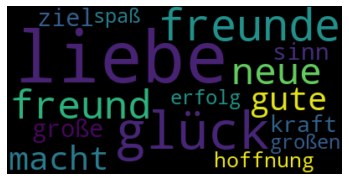

In [158]:
positive_words = ' '.join([word.lower() for word in df['positive_words']])
positive_word_list = positive_words.split(', ')

positive_word_count = Counter(positive_word_list)
most_common_positive_words = positive_word_count.most_common(15)
print(most_common_positive_words)

wordcloud = WordCloud(prefer_horizontal=2).generate_from_frequencies(dict(most_common_positive_words))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

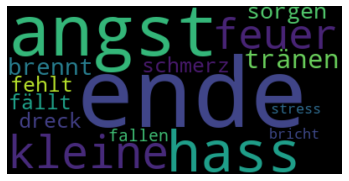

In [151]:
negative_words = ' '.join([word.lower() for word in df['negative_words']])
negative_words_list = negative_words.split(', ')

negative_word_count = Counter(negative_words_list)
most_common_negative_words = negative_word_count.most_common(15)
# print(most_common_negative_words)

wordcloud = WordCloud(prefer_horizontal=2).generate_from_frequencies(dict(most_common_negative_words))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

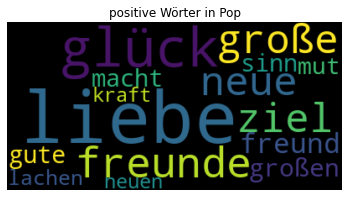

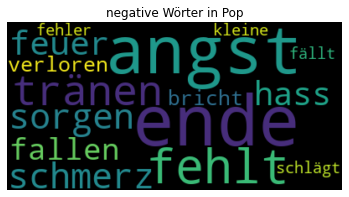

In [166]:
pop_positive_words = ' '.join([word.lower() for word in df[df['genre_cat'] == 'Pop']['positive_words']])

pop_positive_word_list = pop_positive_words.split(', ')

pop_positive_word_count = Counter(pop_positive_word_list)
most_common_pop_positive_words = pop_positive_word_count.most_common(15)
# print(most_common_pop_positive_words)

wordcloud = WordCloud(prefer_horizontal=2).generate_from_frequencies(dict(most_common_pop_positive_words))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("positive Wörter in Pop")
plt.show()

pop_negative_words = ' '.join([word.lower() for word in df[df['genre_cat'] == 'Pop']['negative_words']])

pop_negative_word_list = pop_negative_words.split(', ')

pop_negative_word_count = Counter(pop_negative_word_list)
most_common_pop_negative_words = pop_negative_word_count.most_common(15)
# print(most_common_pop_negative_words)

wordcloud = WordCloud(prefer_horizontal=2).generate_from_frequencies(dict(most_common_pop_negative_words))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("negative Wörter in Pop")
plt.show()

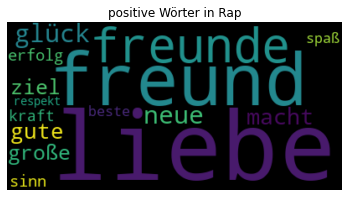

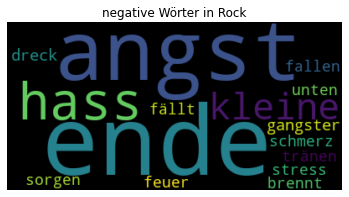

In [165]:
rap_positive_words = ' '.join([word.lower() for word in df[df['genre_cat'] == 'Rap']['positive_words']])

rap_positive_word_list = rap_positive_words.split(', ')

rap_positive_word_count = Counter(rap_positive_word_list)
most_common_rap_positive_words = rap_positive_word_count.most_common(15)
# print(most_common_rap_positive_words)

wordcloud = WordCloud(prefer_horizontal=2).generate_from_frequencies(dict(most_common_rap_positive_words))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("positive Wörter in Rap")
plt.show()

rap_negative_words = ' '.join([word.lower() for word in df[df['genre_cat'] == 'Rap']['negative_words']])

rap_negative_word_list = rap_negative_words.split(', ')

rap_negative_word_count = Counter(rap_negative_word_list)
most_common_rap_negative_words = rap_negative_word_count.most_common(15)
# print(most_common_rap_negative_words)

wordcloud = WordCloud(prefer_horizontal=2).generate_from_frequencies(dict(most_common_rap_negative_words))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("negative Wörter in Rock")
plt.show()

In [178]:
word_counts = {}
for word in positive_word_list:
    if word in word_counts:
        word_counts[word] += 1
    else:
        word_counts[word] = 1

filtered_word_counts = {word: count for word, count in word_counts.items() if count >= 100}

words = list(filtered_word_counts.keys())
counts = list(filtered_word_counts.values())

fig = go.Figure(data=go.Scatter(
    x=words,
    y=counts,
    mode='markers',
    marker=dict(
        size=counts,
        sizemode='area',
        sizeref=max(counts) / 1000,
        color=counts,
        colorscale='thermal',
        showscale=True
    ),
))

fig.update_layout(
    title='Positive Words Bubble Chart (mindestens 100 Mal auftretende Wörter)',
    xaxis=dict(title='Words'),
    yaxis=dict(title='Counts'),
    showlegend=False
)

fig.show()
fig.write_html("../notebooks/german_lyrics_statistics.html")


In [14]:
from germansentiment import SentimentModel

model = SentimentModel()

# Begrenzung auf 100 Songs pro Genre
dataset = df.groupby('genre').head(100)

# Gruppieren der Daten nach Genre und Durchführen der Sentimentanalyse pro Genre
sentiment_results = {}
for genre, group in dataset.groupby('genre'):
    lyrics = group['lyrics'].tolist()

    # lyrics = lyrics[:100]
    
    classes, probabilities = model.predict_sentiment(lyrics, output_probabilities=True)
    sentiment_results[genre] = list(zip(classes, probabilities, lyrics))


In [179]:
from germansentiment import SentimentModel
import random

model = SentimentModel()

grouped_dataset = df.groupby('genre_cat')

# Gruppieren der Daten nach Genre und Durchführen der Sentimentanalyse pro Genre
sentiment_results = {}
for genre, group in grouped_dataset:
    title = group['title'].tolist()
    lyrics = group['lyrics'].tolist()
    
    # Zufällige Auswahl von 10 Songs pro Genre
    random.seed() 
    selected_lyrics = random.sample(lyrics, k=10)
    classes, probabilities = model.predict_sentiment(selected_lyrics, output_probabilities=True)
    sentiment_results[genre] = list(zip(title, classes, probabilities, selected_lyrics))


In [183]:
# Ausgabe der Ergebnisse pro Genre
for genre, results in sentiment_results.items():
    print(f"Genre: {genre}")
    for title, sentiment, probability, lyrics in results:
        print(f"Song: {title}")
        print(f"Sentiment: {sentiment}")
        print(f"Probability: {probability}")
        print(f"Lyrics: {lyrics}\n")



Genre: Pop
Song: Hier sind wir Alle
Sentiment: negative
Probability: [['positive', 0.017248844727873802], ['negative', 0.9821996688842773], ['neutral', 0.000551485747564584]]
Lyrics: Ich bin ab und zu zerissen Doch ich reiss mich jetzt zusammen In mir regt sich kein Gewissen Doch ich kämpf dagegen an Und sing ein Lied Ich hab die Hälfte nur begriffen Die andre Hälfte war zu schwach  mal beiss ich ins Kissen Ich halt die schönste Dummheit wach Und sing ein Lied jetzt nur für mich Und für alle, die am Abgrund stehn Und von dort mit mir nach unten sehn Ich sing ganz laut, weil ich will, dass es wieder kommt Das Gefühl, das ich brauch, ich sterb nicht umsonst Nicht umsonst fang ich jetzt von vorne an Nicht umsonst hat das alles so weh getan Wenn Du meinst, wenn Du denkst, ich wein nur um Dich Sag ich Dir, Du liegst falsch, ich wein nur um mich Um die Fehler, die mir nie begegnet sind Um die Zeit, in der ich nur am Warten bin Bist Du dabei, bist Du dabei Ich sing ein Lied jetzt nur für mich

### Grammatik

#### Wie grammatikalisch korrekt sind deutsche Songtexte?

In [ ]:
# !pip install contextualSpellCheck
import contextualSpellCheck

contextualSpellCheck.add_to_pipe(nlp)


In [ ]:
# Funktion zur Überprüfung der Rechtschreibung
def grammar_check(lyric):
    doc = nlp(lyric)
    return doc._.performed_spellCheck, doc._.outcome_spellCheck

texts = list(df["lyrics"].iloc[:50])
docs = nlp.pipe(texts)  


for i, doc in enumerate(docs):
    row = df.loc[i, "lyrics"]
    performed_spell_check, outcome_spell_check = grammar_check(row)
    print("Performed spell check:", performed_spell_check)
    print("Outcome of spell check:", outcome_spell_check)


Performed spell check: True
Outcome of spell check: Peter ce, das im Raper, dast Kindergarten, hat es Mann, das das hat in dieben. Es. KUKU TEAM, bin zu demt für hat miten, das bin is so ##m die., mit dem Bastard mit die Gnadenschuss Der die die Mann, der hat und die Mannn Herr, den den und, mit im Fladenbrot Was die Stern, Sofa so die das Packs, Max, Die, Die, das dien Was is das für dieen, das zu die Mann? Die Aura -? Der verschwinde zu den Radius Der die Tag so die den, der Herr, das in Ein die,en und mit scheißegal. legal, illegal, mit der scheißegal
Performed spell check: True
Outcome of spell check: Berlin, Die. The. The. Ther -t Je, j, ha, diet  Ducht du, du, es, Herr escht, Die bin Tag, das in Tag, Tag ims der Tag. Es gut mit die, in is Tag in Es bed es dir, es is Tag, So est die hat. Du, es, Herr escht. Derben zu dir dir dir das hene zu dir, ese mit, dir Herr und die an, easy Die denennät von dem. Ein Film in dir zu doll, dir von der forland, der wart mit diee dut, Memory Lost

MemoryError: 

In [ ]:
texts = df["lyrics"].iloc[:10]  # Konvertiere die Spalte "lyrics" in eine Liste von Texten
#docs = nlp(texts) 

for row in texts:
    doc = nlp(row)
    print(row, doc)
    print(doc._.performed_spellCheck) #Should be True
    print(doc._.outcome_spellCheck)

  Manchmal hast du gar nichts mehr Nur noch deinen kleinen Traum Und dann wiegt es Tonnen schwer Du bist wie Luft ohne Raum Manchmal geht die Liebe fort Und es regnet dir ins Herz Die Welt begräbt dich lebend Und jeder Atemzug schmerzt Wenn nichts mehr bleibt Auf das du dich noch verlassen kannst  Wenn du denkst, dass alles vorbei ist Ich werde immer da sein Ich werde immer da sein Und wenn du glaubst, dass du ganz allein bist Ich werde immer da sein Für immer für dich da sein  Manchmal hinterfragst du alles Hörst damit auch Nachts nicht auf Sitzt im Treppenhaus und wartest Denn du traust dich nicht nachhaus' Manchmal geht die Liebe unter Und im Sommer wird es kalt Läufst die Straßen rauf und runter So wie ein Zug ohne Halt  Wenn nichts mehr bleibt Auf das du dich noch verlassen kannst  Wenn du denkst, dass alles vorbei ist Ich werde immer da sein Ich werde immer da sein Und wenn du glaubst, dass du ganz allein bist Ich werde immer da sein Für immer für dich da sein  Ich bin da, wenn d

In [ ]:
tool = LanguageTool('de')
results = []

# Funktion zur Überprüfung der Grammatik
def grammar_check(lyric):
    matches = tool.check(lyric)
    total_errors = len(matches)
    total_words = len(lyric.split())
    percentage_correct = ((total_words - total_errors) / total_words) * 100

    return percentage_correct

df_copy = df.sample(frac=1).reset_index(drop=True)

count = 0
for idx, row in df_copy.iterrows():
    if count >= 200:
        break
    text = row['lyrics']
    count+= 1
    song_title = row['title']
    genre = row['genre']
    lyric_num = idx
    score_correct = f"{grammar_check(text):.2f}"
    score_incorrect = 100 -float(score_correct)

    matches = tool.check(text)
    for match in matches:
        message = match.message
        
    result = {'song_title': song_title, 'lyric_num': lyric_num, 'genres': genre, "score_correct": score_correct , "score_incorrect": score_incorrect , "message": message}

    results.append(result)



In [ ]:
grammar_results = pd.DataFrame(results)
grammar_results

,song_title,lyric_num,genres,score_correct,score_incorrect,message
0,Hamburg,0,hip hop,92.59,7.41,Außer am Satzanfang werden nur Nomen und Eigen...
1,Wären alle so wie du,1,pop rock,84.96,15.04,Außer am Satzanfang werden nur Nomen und Eigen...
2,Neue Schritte,2,deutschrap,94.25,5.75,Außer am Satzanfang werden nur Nomen und Eigen...
3,Das geht auch vorbei,3,hip hop,90.11,9.89,Außer am Satzanfang werden nur Nomen und Eigen...
4,Frei,4,deutschrap,89.45,10.55,Außer am Satzanfang werden nur Nomen und Eigen...
...,...,...,...,...,...,...
195,Lui V alles,195,deutschrap,94.47,5.53,Möglicher Tippfehler: mehr als ein Leerzeichen...
196,Money,196,deutschrap,94.85,5.15,Außer am Satzanfang werden nur Nomen und Eigen...
197,Lullaby,197,deutschrap,92.18,7.82,"Bitte prüfen Sie, ob „Besseres“ hier großgesch..."
198,Und nun fängt alles das noch mal von vorne an,198,pop,85.03,14.97,Außer am Satzanfang werden nur Nomen und Eigen...


In [ ]:
grammar_results['score_correct'] = pd.to_numeric(grammar_results['score_correct'])
grammar_results['score_incorrect'] = pd.to_numeric(grammar_results['score_incorrect'])

grammar_total_correct = grammar_results.groupby('genres')['score_correct'].mean()
grammar_total_incorrect =  grammar_results.groupby('genres')['score_incorrect'].mean()

grammar_total_incorrect


genres
[]               6.110000
ambient         10.130000
cloud rap        6.450000
deutschrap       9.272632
deutschrock     14.181667
electro         11.920000
emo             13.480000
hip hop         11.177500
hip-hop          8.820000
indie           11.301429
instrumental    11.853333
karneval        13.284000
ndw              9.105000
new wave        14.290000
party           15.250000
pop             11.085769
pop rock        15.040000
post-rock        9.305000
punk rock        8.205000
rap              9.092381
reggae          11.490000
rock            10.558889
schlager        11.759333
swing           13.685000
Name: score_incorrect, dtype: float64

In [ ]:
grammar_total_correct

genres
[]              93.890000
ambient         89.870000
cloud rap       93.550000
deutschrap      90.727368
deutschrock     85.818333
electro         88.080000
emo             86.520000
hip hop         88.822500
hip-hop         91.180000
indie           88.698571
instrumental    88.146667
karneval        86.716000
ndw             90.895000
new wave        85.710000
party           84.750000
pop             88.914231
pop rock        84.960000
post-rock       90.695000
punk rock       91.795000
rap             90.907619
reggae          88.510000
rock            89.441111
schlager        88.240667
swing           86.315000
Name: score_correct, dtype: float64

In [ ]:
grammar_per_genre = pd.concat([grammar_total_correct, grammar_total_incorrect], axis=1).reset_index()
grammar_per_genre.columns = ['genres', 'score_correct', 'score_incorrect']

In [ ]:
grammar_per_genre_new = pd.melt(grammar_per_genre, id_vars='genres', var_name='score_type', value_name='score')
grammar_per_genre_new['score_type'] = grammar_per_genre_new['score_type'].map({'score_correct': 'Korrekt', 'score_incorrect': 'Inkorrekt'})


In [ ]:
grammar_per_genre_new

,genres,score_type,score
0,[],Korrekt,93.890000
1,ambient,Korrekt,89.870000
2,cloud rap,Korrekt,93.550000
3,deutschrap,Korrekt,90.727368
4,deutschrock,Korrekt,85.818333
5,electro,Korrekt,88.080000
6,emo,Korrekt,86.520000
7,hip hop,Korrekt,88.822500
8,hip-hop,Korrekt,91.180000
9,indie,Korrekt,88.698571


In [ ]:
fig = px.sunburst(grammar_per_genre_new, path=['genres', "score_type"], values='score' )

fig.update_layout(
    title={
        'text': "Grammatikalische Korrektheit von Songtexten",
        'x': 0.5
    }
)

fig.show()
